<a href="https://colab.research.google.com/github/rafaelrodolfon/analytic/blob/main/Copy_of_Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd
import gc

In [6]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rafaelrodolfo","key":"5c8767f7c38909a4751ac4bfc3acb753"}'}

In [3]:
pip install kaggle -q

In [10]:
!cp kaggle.json ~/.kaggle/

In [4]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
# Verificar o diretório atual
!pwd

# Download do dataset (ajustar o caminho se necessário)
!kaggle datasets download -d thalitaalves/queimadas-brasil-2011-2021

/content
Dataset URL: https://www.kaggle.com/datasets/thalitaalves/queimadas-brasil-2011-2021
License(s): unknown
queimadas-brasil-2011-2021.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!kaggle datasets list -s "queimadas"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [4]:
!unzip queimadas-brasil-2011-2021.zip -d queimadas-brasil-2011-2021

Archive:  queimadas-brasil-2011-2021.zip
  inflating: queimadas-brasil-2011-2021/focos-queimadas-brasil-2011-2021.csv  


In [9]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [10]:
df = pd.read_csv('/content/queimadas-brasil-2011-2021/focos-queimadas-brasil-2011-2021.csv')
df

,Unnamed: 0,datahora,satelite,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,0,2011/01/01 04:33:00,AQUA_M-M,SAO PAULO,ITUPEVA,Mata Atlantica,NaN,NaN,NaN,-23.14400,-47.11800,NaN
1,1,2011/01/01 09:05:48,NOAA-16N,RIO GRANDE DO NORTE,TOUROS,Caatinga,NaN,NaN,NaN,-5.32167,-35.62667,NaN
2,2,2011/01/01 12:45:00,GOES-12,BAHIA,GLORIA,Caatinga,NaN,NaN,NaN,-9.03354,-38.32000,NaN
3,3,2011/01/01 12:45:00,GOES-12,BAHIA,GLORIA,Caatinga,NaN,NaN,NaN,-9.00355,-38.33000,NaN
4,4,2011/01/01 13:00:00,GOES-12,PERNAMBUCO,FLORESTA,Caatinga,NaN,NaN,NaN,-8.81357,-38.53000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29165016,4404595,2021/09/14 04:59:00,NPP-375,GOIAS,NOVA IGUACU DE GOIAS,Cerrado,119.0,0.0,1.0,-14.34131,-49.33053,1.6
29165017,4404596,2021/09/14 04:59:00,NPP-375,GOIAS,NOVA IGUACU DE GOIAS,Cerrado,117.0,0.0,1.0,-14.34250,-49.35736,1.2
29165018,4404597,2021/09/14 04:59:00,NPP-375,GOIAS,NOVA IGUACU DE GOIAS,Cerrado,119.0,0.0,1.0,-14.34362,-49.34859,3.1
29165019,4404598,2021/09/14 04:59:00,NPP-375,GOIAS,NOVA IGUACU DE GOIAS,Cerrado,119.0,0.0,1.0,-14.34417,-49.34423,3.1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165021 entries, 0 to 29165020
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   datahora      object 
 2   satelite      object 
 3   estado        object 
 4   municipio     object 
 5   bioma         object 
 6   diasemchuva   float64
 7   precipitacao  float64
 8   riscofogo     float64
 9   latitude      float64
 10  longitude     float64
 11  frp           float64
dtypes: float64(6), int64(1), object(5)
memory usage: 2.6+ GB


In [12]:
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Converter a coluna 'datahora' para o formato datetime
df['datahora'] = pd.to_datetime(df['datahora'])

# Criar uma nova coluna 'data' com a parte de data
df['data'] = df['datahora'].dt.date

# Criar uma nova coluna 'hora' com a parte de hora
df['hora'] = df['datahora'].dt.time

In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
datahora,0
satelite,0
estado,0
municipio,0
bioma,1000
diasemchuva,4855864
precipitacao,4855864
riscofogo,4855864
latitude,0


In [14]:
# Definir a opção para não usar notação científica
pd.set_option('display.float_format', '{:.2f}'.format)

# Agora, ao calcular os resumos estatísticos, os resultados aparecerão sem notação científica
print("Máximo:")
print(df_numerico.max())

print("\nMínimo:")
print(df_numerico.min())

print("\nMédia:")
print(df_numerico.mean())

print("\nMediana:")
print(df_numerico.median())



Máximo:
Unnamed: 0     5188858.00
diasemchuva        120.00
precipitacao       203.70
riscofogo            1.00
latitude             5.23
longitude          -32.42
frp               9722.60
dtype: float64

Mínimo:
Unnamed: 0        0.00
diasemchuva    -999.00
precipitacao      0.00
riscofogo      -999.00
latitude        -33.71
longitude       -73.93
frp              -3.70
dtype: float64

Média:
Unnamed: 0     1662853.40
diasemchuva         13.70
precipitacao         0.72
riscofogo           -7.75
latitude           -10.37
longitude          -51.47
frp                 19.31
dtype: float64

Mediana:
Unnamed: 0     1418316.00
diasemchuva          7.00
precipitacao         0.00
riscofogo            1.00
latitude            -9.65
longitude          -50.59
frp                  7.40
dtype: float64


In [15]:
df[df['precipitacao'].isnull() & (df['estado'] == 'PERNAMBUCO')]

,Unnamed: 0,datahora,satelite,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,data,hora
4,4,2011-01-01 13:00:00,GOES-12,PERNAMBUCO,FLORESTA,Caatinga,NaN,NaN,NaN,-8.81,-38.53,NaN,2011-01-01,13:00:00
18,18,2011-01-01 15:15:00,GOES-12,PERNAMBUCO,JATOBA,Caatinga,NaN,NaN,NaN,-9.18,-38.22,NaN,2011-01-01,15:15:00
23,23,2011-01-01 15:45:00,GOES-12,PERNAMBUCO,JATOBA,Caatinga,NaN,NaN,NaN,-9.26,-38.17,NaN,2011-01-01,15:45:00
24,24,2011-01-01 15:45:00,GOES-12,PERNAMBUCO,JATOBA,Caatinga,NaN,NaN,NaN,-9.18,-38.17,NaN,2011-01-01,15:45:00
66,66,2011-01-01 21:38:36,NOAA-16,PERNAMBUCO,GARANHUNS,Mata Atlantica,NaN,NaN,NaN,-8.94,-36.45,NaN,2011-01-01,21:38:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29141205,4380784,2021-09-13 15:22:00,NOAA-20,PERNAMBUCO,OURICURI,Caatinga,NaN,NaN,NaN,-7.93,-40.11,4.90,2021-09-13,15:22:00
29141207,4380786,2021-09-13 15:22:00,NOAA-20,PERNAMBUCO,OURICURI,Caatinga,NaN,NaN,NaN,-7.93,-40.11,6.30,2021-09-13,15:22:00
29142011,4381590,2021-09-13 15:22:00,NOAA-20,PERNAMBUCO,PEDRA,Caatinga,NaN,NaN,NaN,-8.66,-36.95,2.70,2021-09-13,15:22:00
29142013,4381592,2021-09-13 15:22:00,NOAA-20,PERNAMBUCO,PEDRA,Caatinga,NaN,NaN,NaN,-8.71,-36.93,2.40,2021-09-13,15:22:00


   Unnamed: 0            datahora  satelite               estado municipio  \
0           0 2011-01-01 04:33:00  AQUA_M-M            SAO PAULO   ITUPEVA   
1           1 2011-01-01 09:05:48  NOAA-16N  RIO GRANDE DO NORTE    TOUROS   
2           2 2011-01-01 12:45:00   GOES-12                BAHIA    GLORIA   
3           3 2011-01-01 12:45:00   GOES-12                BAHIA    GLORIA   
4           4 2011-01-01 13:00:00   GOES-12           PERNAMBUCO  FLORESTA   

            bioma  diasemchuva  precipitacao  riscofogo  latitude  longitude  \
0  Mata Atlantica          NaN           NaN        NaN    -23.14     -47.12   
1        Caatinga          NaN           NaN        NaN     -5.32     -35.63   
2        Caatinga          NaN           NaN        NaN     -9.03     -38.32   
3        Caatinga          NaN           NaN        NaN     -9.00     -38.33   
4        Caatinga          NaN           NaN        NaN     -8.81     -38.53   

   frp        data      hora  
0  NaN  2011-01-01 

<Axes: title={'center': 'Dados Faltantes por Ano'}, xlabel='datahora'>

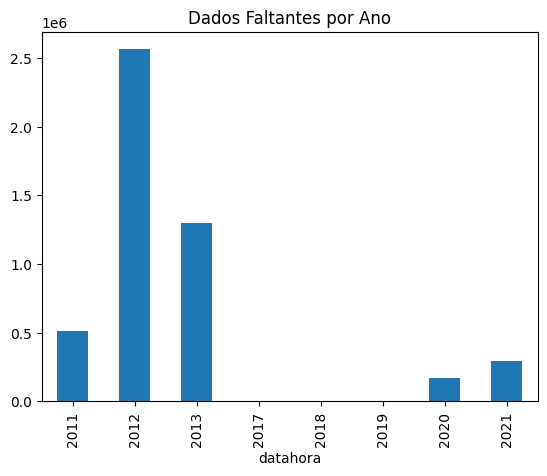

In [16]:
# Ver os registros com valores faltantes
df_missing = df[df[['precipitacao', 'riscofogo', 'diasemchuva']].isna().any(axis=1)]
print(df_missing.head())

# Ver a distribuição dos valores faltantes ao longo do tempo
df_missing.groupby(df['datahora'].dt.year).size().plot(kind='bar', title='Dados Faltantes por Ano')



In [17]:
# Converter a coluna 'data' para o formato de Timestamp para comparações
df['data'] = pd.to_datetime(df['data'])

# Filtrar os dados a partir de 2017
df_2 = df[df['data'] >= pd.to_datetime('2017-01-01')]


In [18]:
del df
del df_missing
del df_numerico
gc.collect()


49

In [19]:
df_2.to_csv('df_tmp.csv', index=False)

In [3]:
df_2 = pd.read_csv('df_tmp.csv')

In [4]:
df_2.isnull().sum()

,0
Unnamed: 0,0
datahora,0
satelite,0
estado,0
municipio,0
bioma,973
diasemchuva,475664
precipitacao,475664
riscofogo,475664
latitude,0


In [5]:
df_2[df_2['bioma'].isnull()] #& (df_2['estado'] == 'PERNAMBUCO')]

,Unnamed: 0,datahora,satelite,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,data,hora
0,0,2017-12-31 00:02:14,GOES-16,Rio Grande do Sul,Sao Jose Do Norte,NaN,NaN,NaN,NaN,-31.860479,-51.770467,NaN,2017-12-31,00:02:14
1,1,2017-12-31 00:05:03,GOES-16,Para,Ulianopolis,NaN,NaN,NaN,NaN,-3.800392,-47.780374,NaN,2017-12-31,00:05:03
2,2,2017-12-31 00:17:13,GOES-16,Rio Grande do Sul,Sao Jose Do Norte,NaN,NaN,NaN,NaN,-31.860479,-51.770467,NaN,2017-12-31,00:17:13
3,3,2017-12-31 01:00:41,GOES-13,Bahia,Curaca,NaN,NaN,NaN,NaN,-9.350429,-39.490323,NaN,2017-12-31,01:00:41
4,4,2017-12-31 01:15:23,METOP-B,Para,Ulianopolis,NaN,NaN,NaN,NaN,-3.780292,-47.787872,NaN,2017-12-31,01:15:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15245120,1341891,2021-10-18 05:16:00,NOAA-20,RIO GRANDE DO SUL,URUGUAIANA,NaN,3.0,0.0,-999.0,-29.461010,-56.801180,0.6,2021-10-18,05:16:00
15721607,1818378,2021-12-30 01:38:52,NOAA-18D,RIO GRANDE DO SUL,LAGOA DOS PATOS,NaN,15.0,0.0,-999.0,-31.876579,-52.236362,NaN,2021-12-30,01:38:52
15721608,1818379,2021-12-30 01:38:52,NOAA-18D,RIO GRANDE DO SUL,LAGOA DOS PATOS,NaN,15.0,0.0,-999.0,-31.877909,-52.246769,NaN,2021-12-30,01:38:52
15814999,1911770,2021-03-08 16:48:00,NPP-375,PARANA,PLANALTO,NaN,4.0,0.0,0.7,-25.764280,-53.852840,4.9,2021-03-08,16:48:00


In [6]:
df_2[df_2['bioma'].isnull()].groupby('estado').count()

,Unnamed: 0,datahora,satelite,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,data,hora
estado,,,,,,,,,,,,,
Alagoas,18,18,18,18,0,0,0,0,18,18,18,18,18
Amapa,1,1,1,1,0,0,0,0,1,1,1,1,1
Amazonas,6,6,6,6,0,0,0,0,6,6,0,6,6
BAHIA,1,1,1,1,0,1,1,1,1,1,0,1,1
Bahia,20,20,20,20,0,0,0,0,20,20,18,20,20
Ceara,59,59,59,59,0,0,0,0,59,59,59,59,59
Goias,4,4,4,4,0,0,0,0,4,4,4,4,4
Maranhao,320,320,320,320,0,0,0,0,320,320,313,320,320
Mato Grosso,53,53,53,53,0,0,0,0,53,53,49,53,53


In [7]:
# Exemplo: Remover duplicatas com base nas colunas 'cidade', 'latitude' e 'longitude'
df_unico = df_2.drop_duplicates(subset=['municipio', 'estado', 'bioma'])

# Converter 'municipio' e 'estado' para maiúsculas
df_unico['municipio'] = df_unico['municipio'].str.upper()
df_unico['estado'] = df_unico['estado'].str.upper()

# Selecionar apenas as colunas desejadas
df_unico = df_unico[['municipio', 'estado', 'bioma', 'latitude', 'longitude']]

# Separar cidades com bioma nulo e não nulo
cidades_com_bioma = df_unico[df_unico['bioma'].notnull()]
cidades_sem_bioma = df_unico[df_unico['bioma'].isnull()]


<ipython-input-7-ed2355048c39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico['municipio'] = df_unico['municipio'].str.upper()
<ipython-input-7-ed2355048c39>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico['estado'] = df_unico['estado'].str.upper()


In [11]:
import numpy as np
from geopy.distance import geodesic

In [12]:
# Função para preencher o bioma faltante dentro do mesmo estado
def preencher_bioma_por_estado(df_sem_bioma, df_com_bioma):
    # Agrupar cidades sem bioma e com bioma pelo estado
    df_sem_bioma_grouped = df_sem_bioma.groupby('estado')
    df_com_bioma_grouped = df_com_bioma.groupby('estado')

    for estado, group_sem_bioma in df_sem_bioma_grouped:
        # Pegar apenas as cidades do mesmo estado que têm bioma preenchido
        if estado in df_com_bioma_grouped.groups:
            group_com_bioma = df_com_bioma_grouped.get_group(estado)

            for i, row in group_sem_bioma.iterrows():
                cidade_atual = (row['latitude'], row['longitude'])
                menor_distancia = np.inf
                bioma_mais_proximo = None

                # Calcular distâncias apenas para as cidades dentro do mesmo estado
                for j, row_vizinha in group_com_bioma.iterrows():
                    cidade_vizinha = (row_vizinha['latitude'], row_vizinha['longitude'])
                    distancia = geodesic(cidade_atual, cidade_vizinha).kilometers

                    if distancia < menor_distancia:
                        menor_distancia = distancia
                        bioma_mais_proximo = row_vizinha['bioma']

                # Preencher o bioma da cidade atual com o da cidade mais próxima
                df_sem_bioma.at[i, 'bioma'] = bioma_mais_proximo


    return df_sem_bioma

# Aplicar a função
df_sem_bioma_preenchido = preencher_bioma_por_estado(cidades_sem_bioma, cidades_com_bioma)


In [13]:
df_sem_bioma_preenchido.isnull().sum()

,0
municipio,0
estado,0
bioma,0
latitude,0
longitude,0


In [14]:
df_sem_bioma_preenchido

,municipio,estado,bioma,latitude,longitude
0,SAO JOSE DO NORTE,RIO GRANDE DO SUL,Pampa,-31.860479,-51.770467
1,ULIANOPOLIS,PARA,Amazonia,-3.800392,-47.780374
3,CURACA,BAHIA,Caatinga,-9.350429,-39.490323
5,CANDIOTA,RIO GRANDE DO SUL,Pampa,-31.520772,-53.709279
6,ITINGA DO MARANHAO,MARANHAO,Amazonia,-4.125394,-47.152370
...,...,...,...,...,...
7420020,AREIA BRANCA,RIO GRANDE DO NORTE,Caatinga,-4.960000,-37.110000
8894427,SAO BORJA,RIO GRANDE DO SUL,Pampa,-28.722900,-56.152000
9214497,ILHA COMPRIDA,SAO PAULO,Mata Atlantica,-24.686570,-47.428810
11857302,URUGUAIANA,RIO GRANDE DO SUL,Pampa,-29.780445,-57.196472


In [15]:
# Converter os nomes de estados e municípios para maiúsculas em ambos os DataFrames
df_2['estado'] = df_2['estado'].str.upper()
df_2['municipio'] = df_2['municipio'].str.upper()

df_sem_bioma_preenchido['estado'] = df_sem_bioma_preenchido['estado'].str.upper()
df_sem_bioma_preenchido['municipio'] = df_sem_bioma_preenchido['municipio'].str.upper()

# Fazer o merge entre df_2 e df_sem_bioma_preenchido com base em estado e município
df_merge = df_2.merge(df_sem_bioma_preenchido[['estado', 'municipio', 'bioma']],
                      on=['estado', 'municipio'],
                      how='left',
                      suffixes=('', '_preenchido'))




<ipython-input-15-d0fe362699d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_bioma_preenchido['estado'] = df_sem_bioma_preenchido['estado'].str.upper()
<ipython-input-15-d0fe362699d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_bioma_preenchido['municipio'] = df_sem_bioma_preenchido['municipio'].str.upper()


In [17]:
# Atualizar apenas os valores NaN na coluna 'bioma' de df com os valores de 'bioma_preenchido'
df_2['bioma'] = df_2['bioma'].combine_first(df_merge['bioma_preenchido'])




In [19]:
df_2.isnull().sum()

,0
Unnamed: 0,0
datahora,0
satelite,0
estado,0
municipio,0
bioma,0
diasemchuva,475664
precipitacao,475664
riscofogo,475664
latitude,0


In [25]:
df_2

,Unnamed: 0,datahora,satelite,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,data,hora
0,0,2017-12-31 00:02:14,GOES-16,RIO GRANDE DO SUL,SAO JOSE DO NORTE,Pampa,NaN,NaN,NaN,-31.860479,-51.770467,NaN,2017-12-31,00:02:14
1,1,2017-12-31 00:05:03,GOES-16,PARA,ULIANOPOLIS,Amazonia,NaN,NaN,NaN,-3.800392,-47.780374,NaN,2017-12-31,00:05:03
2,2,2017-12-31 00:17:13,GOES-16,RIO GRANDE DO SUL,SAO JOSE DO NORTE,Pampa,NaN,NaN,NaN,-31.860479,-51.770467,NaN,2017-12-31,00:17:13
3,3,2017-12-31 01:00:41,GOES-13,BAHIA,CURACA,Caatinga,NaN,NaN,NaN,-9.350429,-39.490323,NaN,2017-12-31,01:00:41
4,4,2017-12-31 01:15:23,METOP-B,PARA,ULIANOPOLIS,Amazonia,NaN,NaN,NaN,-3.780292,-47.787872,NaN,2017-12-31,01:15:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18307824,4404595,2021-09-14 04:59:00,NPP-375,GOIAS,NOVA IGUACU DE GOIAS,Cerrado,119.0,0.0,1.0,-14.341310,-49.330530,1.6,2021-09-14,04:59:00
18307825,4404596,2021-09-14 04:59:00,NPP-375,GOIAS,NOVA IGUACU DE GOIAS,Cerrado,117.0,0.0,1.0,-14.342500,-49.357360,1.2,2021-09-14,04:59:00
18307826,4404597,2021-09-14 04:59:00,NPP-375,GOIAS,NOVA IGUACU DE GOIAS,Cerrado,119.0,0.0,1.0,-14.343620,-49.348590,3.1,2021-09-14,04:59:00
18307827,4404598,2021-09-14 04:59:00,NPP-375,GOIAS,NOVA IGUACU DE GOIAS,Cerrado,119.0,0.0,1.0,-14.344170,-49.344230,3.1,2021-09-14,04:59:00


In [22]:
del df_merge
del df_unico
del df_sem_bioma_preenchido
gc.collect()

496

In [24]:
df_2.to_csv('df_tmp.csv', index=False)

In [4]:
df_2 = pd.read_csv('df_tmp.csv')

In [5]:
df_2['data'] = pd.to_datetime(df_2['data'], errors='coerce')
df_2['mes_ano'] = df_2['data'].dt.to_period('M')

In [6]:
# 3. Preencher 'diasemchuva' com a média por estado, bioma e mês
media_diasemchuva_estado_bioma = df_2.groupby(['estado', 'bioma', 'mes_ano'])['diasemchuva'].transform('mean')
df_2['diasemchuva'].fillna(media_diasemchuva_estado_bioma, inplace=True)

# 4. Preencher 'precipitação' com a mediana por estado, bioma e mês
mediana_precipitacao_estado_bioma = df_2.groupby(['estado', 'bioma', 'mes_ano'])['precipitacao'].transform('median')
df_2['precipitacao'].fillna(mediana_precipitacao_estado_bioma, inplace=True)

# 5. Preencher 'riscodefogo' com a média por estado, bioma e mês
media_riscodefogo_estado_bioma = df_2.groupby(['estado', 'bioma', 'mes_ano'])['riscofogo'].transform('mean')
df_2['riscofogo'].fillna(media_riscodefogo_estado_bioma, inplace=True)

# Opcional: Se você quiser remover as linhas que ainda contêm NaN após o preenchimento
#df_2.dropna(subset=['diasemchuva', 'precipitação', 'riscodefogo'], inplace=True)

# Exibir o DataFrame preenchido
df_2

,Unnamed: 0,datahora,satelite,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,data,hora,mes_ano
0,0,2017-12-31 00:02:14,GOES-16,RIO GRANDE DO SUL,SAO JOSE DO NORTE,Pampa,0.000000,0.0,-41.389790,-31.860479,-51.770467,NaN,2017-12-31,00:02:14,2017-12
1,1,2017-12-31 00:05:03,GOES-16,PARA,ULIANOPOLIS,Amazonia,0.016104,0.0,-6.460233,-3.800392,-47.780374,NaN,2017-12-31,00:05:03,2017-12
2,2,2017-12-31 00:17:13,GOES-16,RIO GRANDE DO SUL,SAO JOSE DO NORTE,Pampa,0.000000,0.0,-41.389790,-31.860479,-51.770467,NaN,2017-12-31,00:17:13,2017-12
3,3,2017-12-31 01:00:41,GOES-13,BAHIA,CURACA,Caatinga,0.000000,0.0,-5.893570,-9.350429,-39.490323,NaN,2017-12-31,01:00:41,2017-12
4,4,2017-12-31 01:15:23,METOP-B,PARA,ULIANOPOLIS,Amazonia,0.016104,0.0,-6.460233,-3.780292,-47.787872,NaN,2017-12-31,01:15:23,2017-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18307824,4404595,2021-09-14 04:59:00,NPP-375,GOIAS,NOVA IGUACU DE GOIAS,Cerrado,119.000000,0.0,1.000000,-14.341310,-49.330530,1.6,2021-09-14,04:59:00,2021-09
18307825,4404596,2021-09-14 04:59:00,NPP-375,GOIAS,NOVA IGUACU DE GOIAS,Cerrado,117.000000,0.0,1.000000,-14.342500,-49.357360,1.2,2021-09-14,04:59:00,2021-09
18307826,4404597,2021-09-14 04:59:00,NPP-375,GOIAS,NOVA IGUACU DE GOIAS,Cerrado,119.000000,0.0,1.000000,-14.343620,-49.348590,3.1,2021-09-14,04:59:00,2021-09
18307827,4404598,2021-09-14 04:59:00,NPP-375,GOIAS,NOVA IGUACU DE GOIAS,Cerrado,119.000000,0.0,1.000000,-14.344170,-49.344230,3.1,2021-09-14,04:59:00,2021-09


In [7]:
# Salvar o DataFrame em formato CSV comprimido com gzip
df_2.to_csv('dados_comprimidos.csv.gz', compression='gzip')

# Carregar o CSV comprimido
df_2 = pd.read_csv('dados_comprimidos.csv.gz')


KeyboardInterrupt: 

In [8]:
df_2.nunique()

,0
Unnamed: 0,5188859
datahora,1471747
satelite,21
estado,27
municipio,5289
bioma,6
diasemchuva,957
precipitacao,1208
riscofogo,874
latitude,3473835


In [9]:
df_2.describe()

,Unnamed: 0,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,data
count,1.830783e+07,1.830783e+07,1.830783e+07,1.830783e+07,1.830783e+07,1.830783e+07,8.054899e+06,18307829
mean,2.024541e+06,1.642460e+01,7.024384e-01,-7.747202e+00,-1.061684e+01,-5.214254e+01,1.931338e+01,2020-01-10 17:00:47.091264512
min,0.000000e+00,-9.990000e+02,0.000000e+00,-9.990000e+02,-3.371335e+01,-7.391000e+01,-3.700000e+00,2017-01-01 00:00:00
25%,9.153910e+05,1.000000e+00,0.000000e+00,6.000000e-01,-1.429200e+01,-5.714595e+01,3.400000e+00,2018-11-19 00:00:00
50%,1.836194e+06,7.000000e+00,0.000000e+00,1.000000e+00,-9.710000e+00,-5.149737e+01,7.400000e+00,2020-07-09 00:00:00
75%,3.018977e+06,2.600000e+01,0.000000e+00,1.000000e+00,-6.611630e+00,-4.659100e+01,1.690000e+01,2020-11-29 00:00:00
max,5.188858e+06,1.200000e+02,2.037000e+02,1.000000e+00,5.194490e+00,-3.479578e+01,9.722600e+03,2021-12-31 00:00:00
std,1.318162e+06,7.248082e+01,3.259626e+00,9.082471e+01,5.881312e+00,7.206330e+00,5.663798e+01,NaN


In [10]:
# Definir a opção para não usar notação científica
pd.set_option('display.float_format', '{:.2f}'.format)

# Agora, ao calcular os resumos estatísticos, os resultados aparecerão sem notação científica
print("Máximo:")
print(df_2.max())



Máximo:
Unnamed: 0                  5188858
datahora        2021-12-31 23:53:21
satelite                  TERRA_M-T
estado                    TOCANTINS
municipio                    ZORTEA
bioma                      Pantanal
diasemchuva                  120.00
precipitacao                 203.70
riscofogo                      1.00
latitude                       5.19
longitude                    -34.80
frp                         9722.60
data            2021-12-31 00:00:00
hora                       23:59:58
mes_ano                     2021-12
dtype: object


In [11]:
print("\nMínimo:")
print(df_2.min())




Mínimo:
Unnamed: 0                        0
datahora        2017-01-01 00:03:00
satelite                     AQUA_M
estado                         ACRE
municipio           ABADIA DE GOIAS
bioma                      Amazonia
diasemchuva                 -999.00
precipitacao                   0.00
riscofogo                   -999.00
latitude                     -33.71
longitude                    -73.91
frp                           -3.70
data            2017-01-01 00:00:00
hora                       00:00:00
mes_ano                     2017-01
dtype: object


In [ ]:
import plotly.express as px

In [ ]:
# Criar o gráfico de colunas
fig = px.bar(df_2,
             x='bioma',
             title='Quantidade de Cidades por Bioma',
             labels={'bioma': 'Bioma'},
             color='bioma',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Exibir o gráfico
fig.show()

In [ ]:
px.bar(df_1,)